# Simple Appliances with multiple functioning time

In [1]:
# importing functions
from ramp import User,calc_peak_time_range,yearly_pattern
import pandas as pd

### Creating a user category 

In [2]:
household = User(
    user_name = "Household",
    num_users = 10,
)

### Creating a simple appliance with two functioning time

In [3]:
indoor_bulb = household.Appliance(
    name = "Indoor Light Bulb",
    number = 6,
    power  = 7,
    num_windows = 2,
    func_time = 120,
    time_fraction_random_variability = 0.2,
    func_cycle = 10
)

indoor_bulb.windows(
    window_1 = [1170,1440], # from 19:30 to 24:00
    window_2 = [0,30], # from 24 to 00:30
    random_var_w = 0.35,
)

<AxesSubplot:>

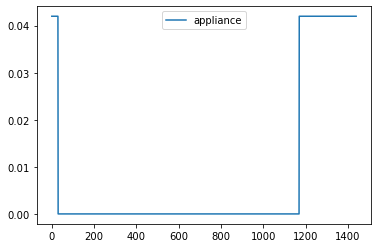

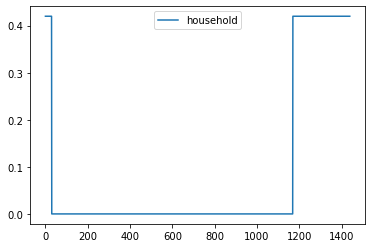

In [4]:
# Checking the maximum profile of the appliance and user

max_profile_bulb = pd.DataFrame(indoor_bulb.maximum_profile,columns=["appliance"])
max_profile_user = pd.DataFrame(household.maximum_profile,columns=["household"])

max_profile_bulb.plot()
max_profile_user.plot()

### Defining the peak time range using the calc_peak_time_range

In [5]:
peak_time_range = calc_peak_time_range(
    user_list = [household]
)

print(peak_time_range)

[675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692
 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708 709 710
 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728
 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746
 747 748]


### Defining the yearly patterns
by default the yearly_pattern function returns weekdays (defined by 0) /weekends (defined by 1) division

In [6]:
year_behaviour = yearly_pattern()

print(year_behaviour)

[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.

### Generating a profile for the ith day of the year

In [7]:
single_profile = household.generate_single_load_profile(
    prof_i = 1, # the day to generate the profile
    peak_time_range = peak_time_range,
    Year_behaviour = year_behaviour
)


<AxesSubplot:>

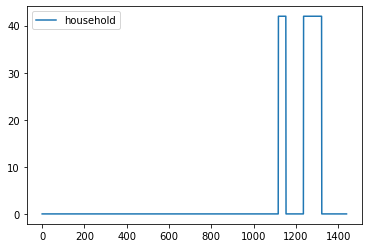

In [8]:
single_profile = pd.DataFrame(single_profile,columns=["household"])
single_profile.plot()

### whole year profile can be generated

In [9]:
whole_year_profile = []

for i in range(365):
    whole_year_profile.extend(
        household.generate_single_load_profile(
                prof_i = i,
                peak_time_range = peak_time_range,
                Year_behaviour = year_behaviour
                
        )
    )

In [10]:
### Generating aggregated_load_profile for the user category

In [11]:
aggregated_profile = household.generate_aggregated_load_profile(
    prof_i = 1,
    peak_time_range = peak_time_range,
    Year_behaviour = year_behaviour
)

<AxesSubplot:>

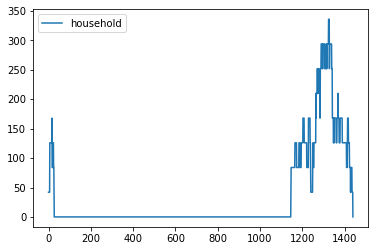

In [12]:
aggregated_profile = pd.DataFrame(aggregated_profile,columns = ["household"])
aggregated_profile.plot()